<a href="https://colab.research.google.com/github/akutayaydin/Magnimind-6-Image-Processing/blob/main/TNT_Project_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from skimage import io, filters
import scipy.ndimage as ndi
import sys
import keras.utils as image
from tensorflow.keras.utils import load_img
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
mypath='/content/gdrive/My Drive/Google Colab Folder/TNT_Project'
print(os.listdir(mypath))

['m05-label.png', 'm05.png']


In [5]:
labeled_image = cv2.imread('/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05-label.png')

In [6]:
unlabeled_image = cv2.imread('/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png')

In [ ]:
#cv2_imshow(unlabeled_image)

In [ ]:
#cv2_imshow(labeled_image)

In [8]:
unlabeled_image.dtype

dtype('uint8')

In [9]:
hist = ndi.histogram(unlabeled_image,min =0 , max =255, bins =256)
hist.shape

(256,)

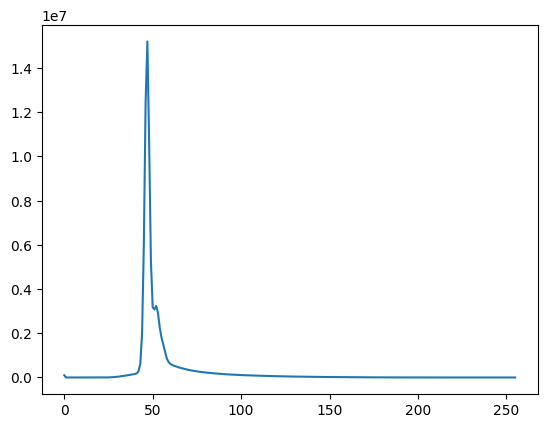

In [10]:
plt.plot(hist)
plt.show()

In [11]:
#Equalization
#cumsum = cumulative distribution function
cdf = hist.cumsum() / hist.sum()
cdf.shape

(256,)

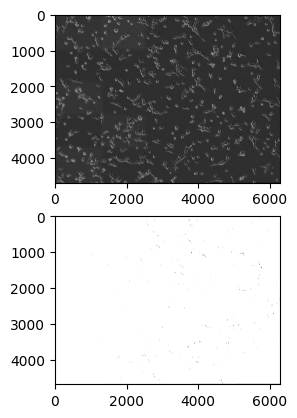

In [12]:
im_equalized = cdf[unlabeled_image] * 255
fig, axes = plt.subplots(2,1)
#plot the histogram
axes[0].imshow(unlabeled_image)
axes[1].imshow(im_equalized)
plt.show()

In [13]:
#Add mask
mask1 = unlabeled_image < 50

In [14]:
im_cells = np.where (unlabeled_image > 50,unlabeled_image,0)

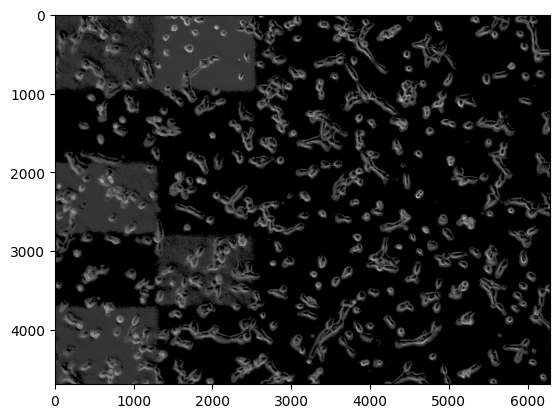

In [15]:
plt.imshow(im_cells,cmap ='gray')

In [47]:
#Tune the mask (data is noisy. so the mask will rarely perfect)
#Dialation: To increase the size of the mask add pixels around the edges

In [58]:
dialation = ndi.binary_dilation(unlabeled_image,iterations =5)

In [59]:
dialation = dialation.astype('uint8')

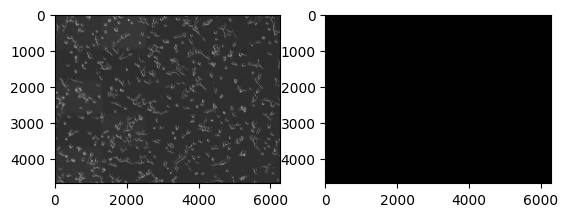

In [64]:
#dialation = ndi.binary_dilation(unlabeled_image)
fig, axes = plt.subplots(1,2)
#plot the histogram
axes[0].imshow(unlabeled_image)
axes[1].imshow(dialation)
plt.show()

In [ ]:
#Apply Filters

In [77]:
import cv2
import numpy as np

def background_and_shading_correction(image, ball_radius):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the rolling ball algorithm for background correction
    kernel_size = ball_radius * 2 + 1
    background_corrected = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size)))

    # Perform shading correction by subtracting the background corrected image from the original image
    shading_corrected = cv2.subtract(gray_image, background_corrected)

    # Convert the shading corrected image back to color (optional)
    shading_corrected_color = cv2.cvtColor(shading_corrected, cv2.COLOR_GRAY2BGR)

    # Combine the shading-corrected image with the original image to get the final result
    result_image = cv2.addWeighted(image, 1, shading_corrected_color, 0.7, 0)

    return result_image

# Example usage:
if __name__ == "__main__":
    # Load your input image (replace "your_image_path.jpg" with the actual image path)
    input_image = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png")

    # Set the radius for the rolling ball algorithm (adjust as needed)
    ball_radius = 30

    # Perform background and shading correction
    output_image = background_and_shading_correction(input_image, ball_radius)

    # Save the processed image (replace "output_image.jpg" with the desired output path)
    cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image.png", output_image)


In [80]:
import cv2

def background_and_shading_correction(image, sigma):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Gaussian filter for background correction
    background_corrected = cv2.GaussianBlur(gray_image, (0, 0), sigmaX=sigma, sigmaY=sigma)

    # Perform shading correction by subtracting the background corrected image from the original image
    shading_corrected = cv2.subtract(gray_image, background_corrected)

    # Convert the shading corrected image back to color (optional)
    shading_corrected_color = cv2.cvtColor(shading_corrected, cv2.COLOR_GRAY2BGR)

    # Combine the shading-corrected image with the original image to get the final result
    result_image = cv2.addWeighted(image, 1, shading_corrected_color, 0.7, 0)

    return result_image

# Example usage:
if __name__ == "__main__":
    # Load your input image (replace "your_image_path.jpg" with the actual image path)
    input_image = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png")

    # Set the sigma value for the Gaussian filter (adjust as needed)
    sigma = 3

    # Perform background and shading correction
    output_image = background_and_shading_correction(input_image, sigma)

    # Save the processed image (replace "output_image.jpg" with the desired output path)
    cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_2.png", output_image)


In [72]:
output_image

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

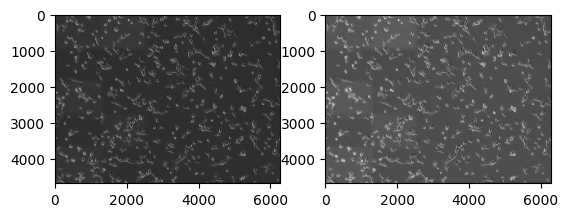

In [76]:
fig, axes = plt.subplots(1,2)
#plot the histogram
axes[0].imshow(unlabeled_image)
axes[1].imshow(output_image)
plt.show()

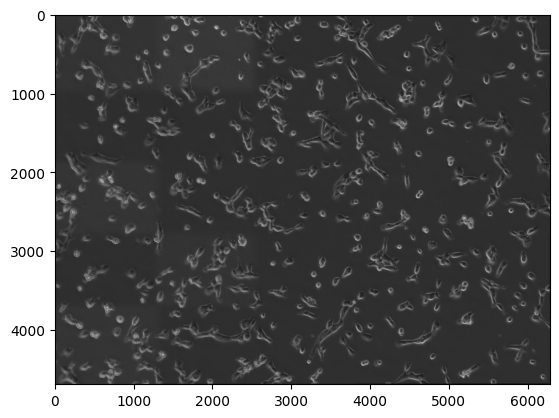

In [70]:
plt.imshow(unlabeled_image)

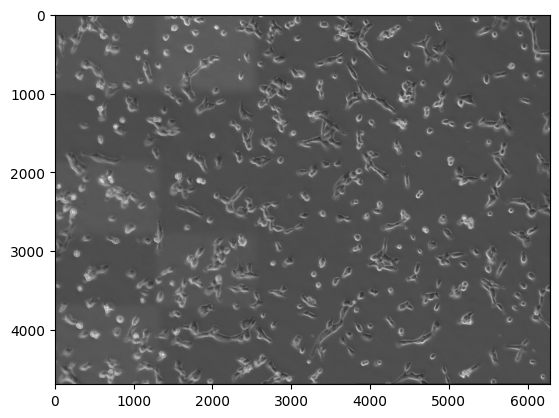

In [69]:
plt.imshow(output_image)